In [126]:
# 자동차 여러 데이터를 하나의 .csv로 통합 후
# 원핫인코딩
# 가정 : 결측치 없음

In [127]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
tmp = []
brands = ['hyundai']

for brand in brands:
    file_path = f"./{brand}.csv"
    df = pd.read_csv(file_path)

    # brand 컬럼 추가
    df["brand"] = brand

    # brand 컬럼을 맨 앞으로 이동
    cols = df.columns.tolist()
    cols = ['brand'] + [col for col in cols if col != 'brand']
    df = df[cols]

    tmp.append(df)

# 전체 병합
df_total = pd.concat(tmp, ignore_index=True)
df_total = df_total.drop_duplicates(
    subset=["model", "year", "oilingtype", "mileage", "price"]
).reset_index(drop=True)
df_total.to_csv("./df_total.csv", index=False, encoding='utf-8')

# Feature (df_total)
# 1. brand
# 2. model
# 3. year
# 4. oilingtype
# 5. mileage
# 6. price

# id 추가
df_add_id = df_total.copy()
df_add_id.insert(0, 'id', range(1, len(df_add_id) + 1))
df_add_id.to_csv("./df_add_id.csv", index=False, encoding='utf-8')

count    1478.000000
mean     2080.175237
std      1348.651236
min        22.000000
25%      1190.000000
50%      1890.000000
75%      2690.000000
max      9999.000000
Name: price, dtype: float64


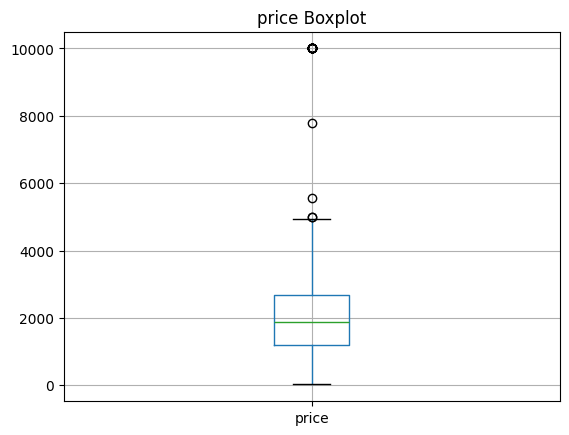

In [129]:
# 이상치 확인, 처리
# mileage 이상치 확인
print(df_total["price"].describe())

# 이상치 그래프로 확인
boxplot = df_total.boxplot(column=['price'])
boxplot.plot()
plt.title('price Boxplot')
plt.show()

In [130]:
# 원핫인코딩 (brand명을 column으로 변환)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand       1478 non-null   object
 1   model       1478 non-null   object
 2   year        1478 non-null   int64 
 3   oilingtype  1478 non-null   object
 4   mileage     1478 non-null   int64 
 5   price       1478 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.4+ KB


In [131]:
df_total.year = df_total.year.astype('str') # year컬럼도 명목형 변수이므로 형식변환 int -> str

In [132]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand       1478 non-null   object
 1   model       1478 non-null   object
 2   year        1478 non-null   object
 3   oilingtype  1478 non-null   object
 4   mileage     1478 non-null   int64 
 5   price       1478 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 69.4+ KB


In [133]:
# 원핫인코딩 진행( 모델까지 원핫인코딩 진행해서 잘못된 것임)
df_total = pd.get_dummies(df_total, prefix_sep='_', drop_first=False)
df_total.to_csv("./car_one_hot_encoding.csv", index=False)

In [134]:
## 이상치 제거

condition = (df_total["price"] < 4000) & (df_total["price"] > 500)
df_total_price_remove = df_total[condition]
df_total_price_remove.to_csv("./df_total_price_remove.csv", index = False)
df_total_price_remove = pd.read_csv("./df_total_price_remove.csv")

count    1310.000000
mean     1962.292366
std       890.718388
min       510.000000
25%      1280.000000
50%      1880.000000
75%      2590.000000
max      3999.000000
Name: price, dtype: float64


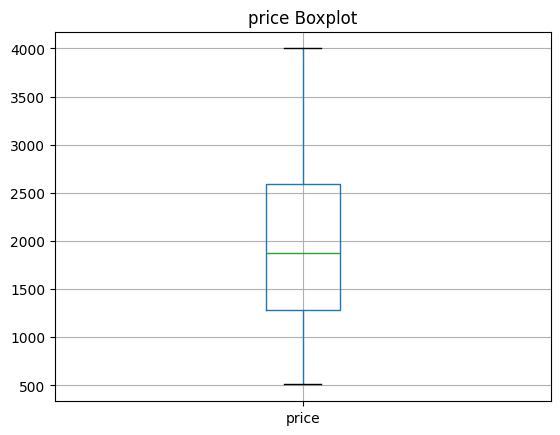

In [135]:
# 이상치 확인, 처리
# mileage 이상치 확인
print(df_total_price_remove["price"].describe())

# 이상치 그래프로 확인
boxplot = df_total_price_remove.boxplot(column=['price'])
boxplot.plot()
plt.title('price Boxplot')
plt.show()

In [139]:
df_total_price_remove.year = df_total.year.astype('str') # year컬럼도 명목형 변수이므로 형식변환 int -> str

AttributeError: 'DataFrame' object has no attribute 'year'

In [145]:
bins = list(range(0, 200001, 10000))

for lower, upper in zip(bins[:-1], bins[1:]):
    if lower == 0:
        cond = df_total_price_remove['mileage'].between(lower, upper)
        col_name = f"mileage_0_{upper}"
    else:
        cond = df_total_price_remove['mileage'].gt(lower) & df_total_price_remove['mileage'].le(upper)
        col_name = f"mileage_{lower+1}_{upper}"
    df_total_price_remove[col_name] = cond
df_total_price_remove = df_total_price_remove.drop(columns=['mileage'])

In [146]:
df_total_price_remove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   price                             1310 non-null   int64
 1   brand_hyundai                     1310 non-null   bool 
 2   model_grandeur                    1310 non-null   bool 
 3   model_grandeurHG                  1310 non-null   bool 
 4   model_grandeurHG_hybrid           1310 non-null   bool 
 5   model_grandeurTG                  1310 non-null   bool 
 6   model_grandeur_GN7                1310 non-null   bool 
 7   model_grandeur_IG                 1310 non-null   bool 
 8   model_grandeur_IG_hybrid          1310 non-null   bool 
 9   model_grandeur_hybrid_GN7         1310 non-null   bool 
 10  model_grandeur_new_luxury         1310 non-null   bool 
 11  model_new_grandeur                1310 non-null   bool 
 12  model_the_luxury_grandeur         

In [147]:
# 원핫인코딩 진행( 모델까지 원핫인코딩 진행해서 잘못된 것임)
df_total_price_remove = pd.get_dummies(df_total_price_remove, prefix_sep='_', drop_first=False)
df_total_price_remove.to_csv("./car_price_remove_one_hot_encoding.csv", index=False)